# Exploratory Data Analysis (EDA)

This notebook explores customer churn patterns to identify key behavioural and contractual drivers.
The objective is to generate insights that inform model selection and retention strategy design.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

CLEAN_PATH = "Downloads/WA_Fn-UseC_-Telco-Customer-Churn_cleaning1.csv"
df = pd.read_csv(CLEAN_PATH)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Churn Overview

An initial analysis is conducted to understand the overall churn rate and class distribution.
This helps identify potential imbalance and business impact.

### Overall Churn Rate

The overall churn rate represents the proportion of customers who have discontinued their service.
This metric provides an initial indication of customer retention performance.

In [11]:
churn_rate = df["Churn"].mean()
print("Churn rate:", round(churn_rate * 100, 2), "%")

Churn rate: 26.54 %


### Churn Rate by Contract Type

Contract structure is a critical factor influencing customer commitment and churn behaviour.
This analysis examines how churn rates vary across different contract types.

In [12]:
contract_churn = df.groupby("Contract")["Churn"].mean().sort_values(ascending=False)
contract_churn

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

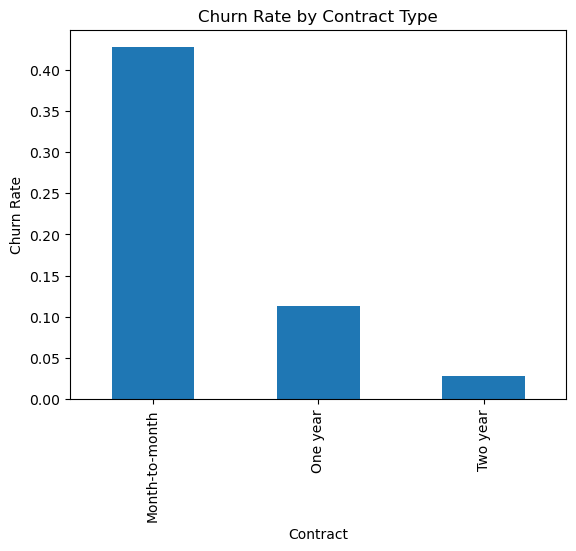

In [13]:
contract_churn.plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Churn Rate")
plt.show()


### Insights: Contract Type and Churn

The analysis shows a clear relationship between contract duration and churn:

- Month-to-month contracts exhibit the highest churn rate (approximately 43%)
- One-year contracts show a significantly lower churn rate
- Two-year contracts have the lowest churn rate

This suggests that customers with flexible, short-term contracts are substantially more likely to churn compared to those with longer-term commitments.

In [14]:
bins = [0, 6, 12, 24, 60, 1000]
labels = ["0-6", "7-12", "13-24", "25-60", "60+"]

df["tenure_band"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

tenure_churn = df.groupby("tenure_band")["Churn"].mean()
tenure_churn

C:\Users\Dell\AppData\Local\Temp\ipykernel_8076\631714478.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("tenure_band")["Churn"].mean()


tenure_band
0-6      0.533333
7-12     0.358865
13-24    0.287109
25-60    0.183430
60+      0.066098
Name: Churn, dtype: float64

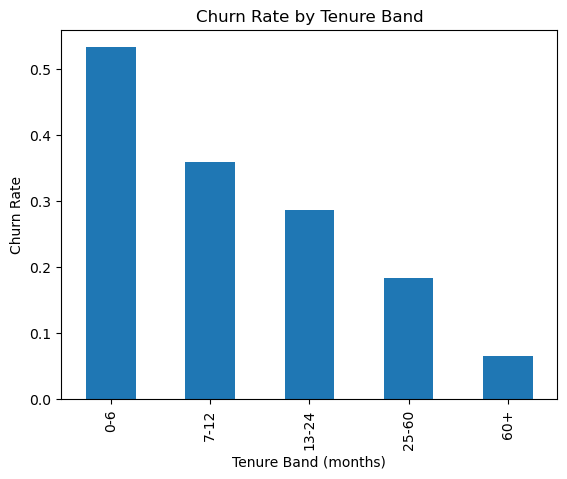

In [15]:
tenure_churn.plot(kind="bar")
plt.title("Churn Rate by Tenure Band")
plt.xlabel("Tenure Band (months)")
plt.ylabel("Churn Rate")
plt.show()

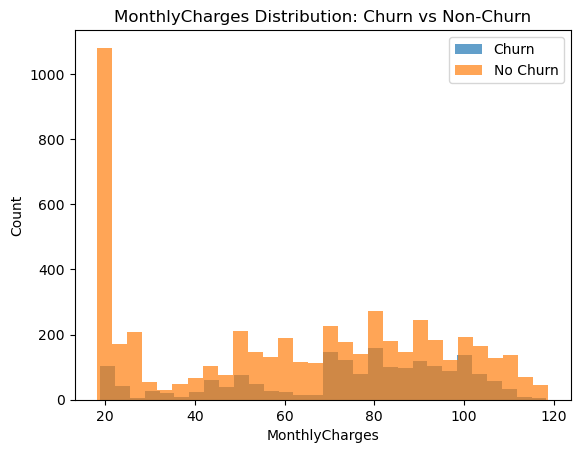

In [16]:
df[df["Churn"] == 1]["MonthlyCharges"].plot(kind="hist", bins=30, alpha=0.7)
df[df["Churn"] == 0]["MonthlyCharges"].plot(kind="hist", bins=30, alpha=0.7)
plt.title("MonthlyCharges Distribution: Churn vs Non-Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("Count")
plt.legend(["Churn", "No Churn"])
plt.show()

### Why this matters for the business
Understanding which contract types and tenure stages churn most helps target retention offers (e.g., converting month-to-month customers to longer contracts) and improve onboarding for early-tenure customers.

### Business Implications

The strong association between contract type and churn indicates that contract structure is a key driver of customer retention.
These insights support the inclusion of contract-related features in the churn prediction model and highlight opportunities for contract-based retention strategies.